In [69]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, InceptionV3, ResNet50, MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import os

# Paths and settings
dataset_path = 'data/Uang Baru'  # Your dataset folder
img_size = (224, 224)
batch_size = 32
num_epochs = 30

# Create ImageDataGenerator with augmentation and validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,         # 20% for validation
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Load training data (80%)
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Load validation data (20%)
val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

'''
# Load VGG16 model without top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze convolutional layers

# Add custom classifier on top
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Unfreeze the last convolution block
for layer in base_model.layers[-30:]:
    layer.trainable = True

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=num_epochs
)

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

loss, acc = model.evaluate(val_data)
print(f"Validation Accuracy: {acc:.2f}, Validation Loss: {loss:.4f}")
'''

Found 1028 images belonging to 7 classes.
Found 253 images belonging to 7 classes.


'\n# Load VGG16 model without top layers\nbase_model = MobileNetV2(weights=\'imagenet\', include_top=False, input_shape=(224, 224, 3))\nbase_model.trainable = False  # Freeze convolutional layers\n\n# Add custom classifier on top\nx = Flatten()(base_model.output)\nx = Dense(128, activation=\'relu\')(x)\nx = Dropout(0.5)(x)\noutput = Dense(train_data.num_classes, activation=\'softmax\')(x)\n\nmodel = Model(inputs=base_model.input, outputs=output)\n\n# Unfreeze the last convolution block\nfor layer in base_model.layers[-30:]:\n    layer.trainable = True\n\n# Compile the model\nmodel.compile(optimizer=Adam(learning_rate=0.0001),\n              loss=\'categorical_crossentropy\',\n              metrics=[\'accuracy\'])\n\n# Train the model\nhistory = model.fit(\n    train_data,\n    validation_data=val_data,\n    epochs=num_epochs\n)\n\nimport matplotlib.pyplot as plt\n\nplt.plot(history.history[\'accuracy\'], label=\'train acc\')\nplt.plot(history.history[\'val_accuracy\'], label=\'val acc\

In [78]:
train_data.class_indices.keys()

dict_keys(['100RB', '10RB', '1RB', '20RB', '2RB', '50RB', '5RB'])

In [65]:
# Save the trained model
model.save('mobilenetv2_custom_model.keras')

In [57]:
from tensorflow.keras.models import load_model

model = load_model('vgg16_custom_model.keras')

c:\Users\modern14\VSCode\Projects\.vision\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


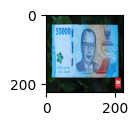

50RB


In [66]:
# Function to predict a single image
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_image(img_path):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) / 255.0

    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions[0])
    class_labels = list(train_data.class_indices.keys())

    plt.figure(figsize=(1,1))
    plt.imshow(img, )
    plt.show()
    
    return class_labels[predicted_index]

# Example usage
print(predict_image("data/test/2.jpg"))


1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


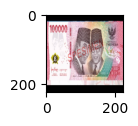

100RB
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


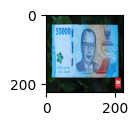

50RB
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


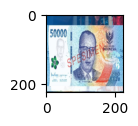

50RB
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


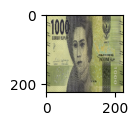

1RB
5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


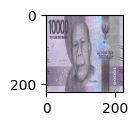

20RB
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


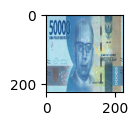

20RB
7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


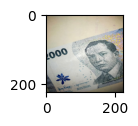

20RB
8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


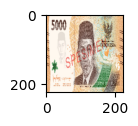

100RB
9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


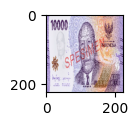

10RB
10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


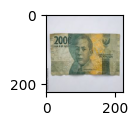

1RB
11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


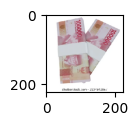

100RB
12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


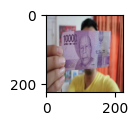

100RB
13
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


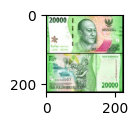

20RB
14
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


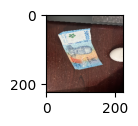

20RB
15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


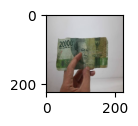

1RB
16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


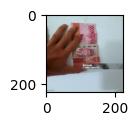

100RB
17
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


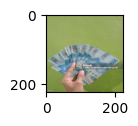

20RB
18
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


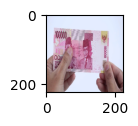

100RB
19
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


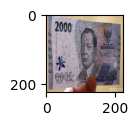

1RB
20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


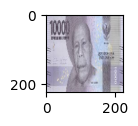

1RB
21
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


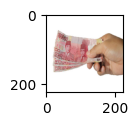

100RB


In [67]:
for i in range(1, 22):
    print(i)
    print(predict_image(f"data/test/{i}.jpg"))